In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
df = pd.read_csv('ci_cb_2023-06-26.csv')
df['Anchor'] = np.where(df['Condition'] == 'Low', 118, 353)
df['Mag_Rev1'] = abs(df['response_2'] - df['response_1'])
df['Mag_Rev2'] = abs(df['response_3'] - df['response_2'])
df['Mag_Rev'] = abs(df['response_3'] - df['response_1'])
df['Initial_Error'] = abs(df['response_1'] - df['true_answer'])
df['Second_Error'] = abs(df['response_2'] - df['true_answer'])
df['Final_Error'] = abs(df['response_3'] - df['true_answer'])
df['Dist_Anchor_1'] = abs(df['response_1'] - df['Anchor'])
df['Dist_Anchor_2'] = abs(df['response_2'] - df['Anchor'])
df['Dist_Anchor_3'] = abs(df['response_3'] - df['Anchor'])
df['Difference_Initial_Anchor'] = df['response_1'] - df['Anchor']
df['Difference_Initial_Truth'] = df['response_1'] - 246
df['Matched'] = np.where(df['Difference_Initial_Anchor'] * df['Difference_Initial_Truth'] > 0, 1, 0)
df['Change_accuracy'] = df['Initial_Error'] - df['Final_Error']
df_raw = df.copy()

In [3]:
# Create table

print('Medians')
print(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_1'].median())
print(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_2'].median())
print(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_3'].median())

print(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_1'].median())
print(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_2'].median())
print(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_3'].median())

print(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_1'].median())
print(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_2'].median())
print(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_3'].median())

print(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_1'].median())
print(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_2'].median())
print(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_3'].median())

print('\nMeans')
print(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_1'].mean())
print(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_2'].mean())
print(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_3'].mean())

print(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_1'].mean())
print(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_2'].mean())
print(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_3'].mean())

print(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_1'].mean())
print(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_2'].mean())
print(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_3'].mean())

print(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_1'].mean())
print(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_2'].mean())
print(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_3'].mean())

Medians
209.0
210.0
211.5
200.0
200.0
200.0
137.5
150.0
150.0
150.0
150.0
150.0

Means
334.74093264248705
221.54025974025973
219.64438502673798
239.64469914040114
223.92351274787535
224.24425287356323
152.78378378378378
161.722371967655
157.17728531855957
171.44837758112095
175.55619596541786
176.21005917159763


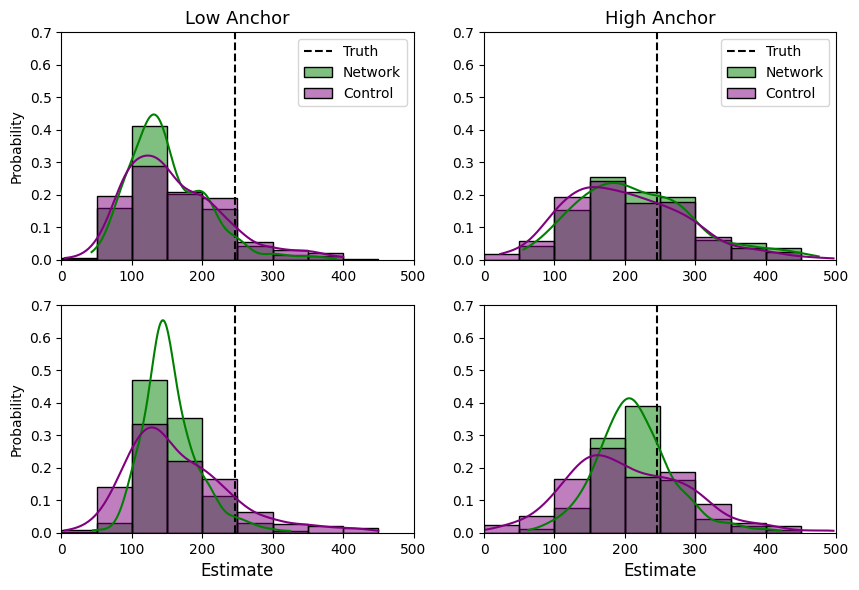

In [4]:
# Make PDFs of the data each round
df = df.loc[(df['response_1'] < 500) & (df['response_2'] < 500) & (df['response_3'] < 500)]

fig, axs = plt.subplots(2, 2, figsize=(10, 6.5))
upper_lim = 500
upper_lim_y = 0.7
bin_bounds = [i * 50 for i in range(10)]

for ax in axs.flatten():
    ax.axvline(246, color='black', linestyle='--', label='Truth')
    ax.set_xlim(0, upper_lim)
    ax.set_ylim(0, upper_lim_y)
    ax.set_title('')

sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_1'], bins=bin_bounds, ax=axs[0, 0], kde=True, color='green',alpha=0.5, stat='probability',label='Network')
sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_1'], bins=bin_bounds, ax=axs[0, 0], kde=True, color='purple',alpha=0.5, stat='probability',label='Control')

sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_1'], bins=bin_bounds, ax=axs[0, 1], kde=True, color='green',alpha=0.5, stat='probability',label='Network')
sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_1'], bins=bin_bounds, ax=axs[0, 1], kde=True, color='purple',alpha=0.5, stat='probability',label='Control')


sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_3'], bins=bin_bounds, ax=axs[1, 0], kde=True, color='green',alpha=0.5, stat='probability')
sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_3'], bins=bin_bounds, ax=axs[1, 0], kde=True, color='purple',alpha=0.5, stat='probability')

sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_3'], bins=bin_bounds, ax=axs[1, 1], kde=True, color='green',alpha=0.5, stat='probability')
sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_3'], bins=bin_bounds, ax=axs[1, 1], kde=True, color='purple',alpha=0.5, stat='probability')

axs[0, 0].set_title('Low Anchor',fontsize=13)
axs[0, 1].set_title('High Anchor',fontsize=13)
axs[0,0].legend()
axs[0,1].legend()
axs[0,0].set_xlabel(None)
axs[0,1].set_xlabel(None)
axs[0,1].set_ylabel(None)
axs[1,1].set_ylabel(None)
axs[1, 0].set_xlabel('Estimate',fontsize=12)
axs[1, 1].set_xlabel('Estimate',fontsize=12)



plt.show()

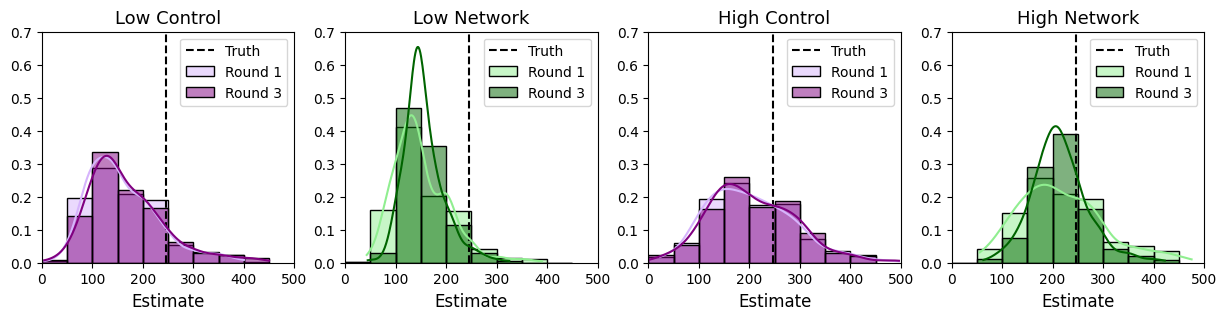

In [5]:
# Make PDFs of the data each round
df = df.loc[(df['response_1'] < 500) & (df['response_2'] < 500) & (df['response_3'] < 500)]

fig, axs = plt.subplots(1, 4, figsize=(15, 3))
upper_lim = 500
upper_lim_y = 0.7
bin_bounds = [i * 50 for i in range(10)]

for ax in axs.flatten():
    ax.axvline(246, color='black', linestyle='--', label='Truth')
    ax.set_xlim(0, upper_lim)
    ax.set_ylim(0, upper_lim_y)
    ax.set_title('')

sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_1'], bins=bin_bounds, ax=axs[0], kde=True, color='#D6B4FC',alpha=0.5, stat='probability',label='Round 1')
sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_3'], bins=bin_bounds, ax=axs[0], kde=True, color='purple',alpha=0.5, stat='probability',label='Round 3')

sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_1'], bins=bin_bounds, ax=axs[1], kde=True, color='lightgreen',alpha=0.5, stat='probability',label='Round 1')
sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_3'], bins=bin_bounds, ax=axs[1], kde=True, color='darkgreen',alpha=0.5, stat='probability',label='Round 3')

sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_1'], bins=bin_bounds, ax=axs[2], kde=True, color='#D6B4FC',alpha=0.5, stat='probability',label='Round 1')
sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_3'], bins=bin_bounds, ax=axs[2], kde=True, color='purple',alpha=0.5, stat='probability',label='Round 3')

sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_1'], bins=bin_bounds, ax=axs[3], kde=True, color='lightgreen',alpha=0.5, stat='probability',label='Round 1')
sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_3'], bins=bin_bounds, ax=axs[3], kde=True, color='darkgreen',alpha=0.5, stat='probability',label='Round 3')


axs[0].set_title('Low Control',fontsize=13)
axs[1].set_title('Low Network',fontsize=13)
axs[2].set_title('High Control',fontsize=13)
axs[3].set_title('High Network',fontsize=13)

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()

axs[0].set_ylabel(None)
axs[1].set_ylabel(None)
axs[2].set_ylabel(None)
axs[3].set_ylabel(None)
axs[0].set_xlabel('Estimate',fontsize=12)
axs[1].set_xlabel('Estimate',fontsize=12)
axs[2].set_xlabel('Estimate',fontsize=12)
axs[3].set_xlabel('Estimate',fontsize=12)


plt.show()

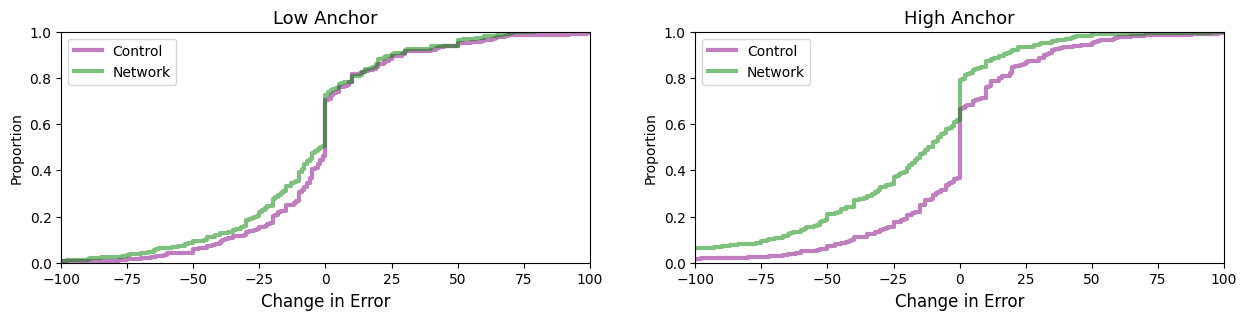

In [62]:
df = df.loc[df.Change_accuracy.abs() < 200]

bin_bounds = [i * 40 - 200 for i in range(11)]

fig, axs = plt.subplots(1, 2, figsize=(15, 3))

# Create CDF
sns.ecdfplot(data=df.loc[(df.Net_type == 'Control') & (df.Condition == 'Low')], x='Change_accuracy', ax=axs[0], color='purple', alpha=0.5, label='Control', linewidth=3)
sns.ecdfplot(data=df.loc[(df.Net_type == 'Network') & (df.Condition == 'Low')], x='Change_accuracy', ax=axs[0], color='green', alpha=0.5, label='Network', linewidth=3)

sns.ecdfplot(data=df.loc[(df.Net_type == 'Control') & (df.Condition == 'High')], x='Change_accuracy', ax=axs[1], color='purple', alpha=0.5, label='Control', linewidth=3)
sns.ecdfplot(data=df.loc[(df.Net_type == 'Network') & (df.Condition == 'High')], x='Change_accuracy', ax=axs[1], color='green', alpha=0.5, label='Network', linewidth=3)

axs[0].set_xlim(-100, 100)
axs[1].set_xlim(-100, 100)

axs[0].legend()
axs[1].legend()

axs[0].set_title('Low Anchor',fontsize=13)
axs[1].set_title('High Anchor',fontsize=13)
axs[0].set_xlabel('Change in Error',fontsize=12)
axs[1].set_xlabel('Change in Error',fontsize=12)

plt.show()


In [6]:
df = df_raw.copy()

away, toward, away_cis, toward_cis = [], [], [], []

# Individual level distance to the anchor; groupby network to account for interactions
for cond in ['Network','Control']:
      df_temp = df.loc[df.Net_type == cond].dropna(subset=['Matched', 'Dist_Anchor_1', 'Dist_Anchor_2', 'Dist_Anchor_3'])
      df_temp = df_temp.groupby(['group','Matched']).agg({'Dist_Anchor_1': np.median,'Dist_Anchor_2': np.median,'Dist_Anchor_3': np.median})
      df_temp['Change_in_Distance'] = df_temp['Dist_Anchor_3'] - df_temp['Dist_Anchor_1']
      df_temp = df_temp.reset_index(level=['Matched'])


      away.append(df_temp.loc[df_temp.Matched == 0]['Change_in_Distance'].mean())
      toward.append(df_temp.loc[df_temp.Matched == 1]['Change_in_Distance'].mean())
      away_cis.append(1.96*df_temp.loc[df_temp.Matched == 0]['Change_in_Distance'].std() / np.sqrt(df_temp['Change_in_Distance'].count()))
      toward_cis.append(1.96*df_temp.loc[df_temp.Matched == 1]['Change_in_Distance'].std() / np.sqrt(df_temp['Change_in_Distance'].count()))

df_individuals = pd.DataFrame({'Away':away, 'Toward':toward, 'Away_cis':away_cis, 'Toward_cis':toward_cis})


away, toward, away_cis, toward_cis = [], [], [], []

# Group level distance to the anchor
for cond in ['Network','Control']:
    df_temp = df.loc[df.Net_type == cond]
    df_temp = df_temp.groupby('group').agg({'response_1': np.median, 'response_3': np.median, 'Anchor': np.median})

    # Calculate Crowd performance
    df_temp['Dif_1'] = abs(df_temp.response_1 - df_temp.Anchor)
    df_temp['Dif_3'] = abs(df_temp.response_3 - df_temp.Anchor)
    df_temp['Change'] =  df_temp['Dif_3'] - df_temp['Dif_1']

    # Group by whether the anchor is in the direction of truth (Matched == 1) or not (Matched == 0)
    df_temp['Difference_Initial_Anchor'] = df_temp['response_1'] - df_temp['Anchor']
    df_temp['Difference_Initial_Truth'] = df_temp['response_1'] - 246
    df_temp['Matched'] = np.where(df_temp['Difference_Initial_Anchor'] * df_temp['Difference_Initial_Truth'] > 0, 1, 0)
    df_t = df_temp.loc[df_temp.Matched == 1].dropna(subset=['Dif_1', 'Dif_3'])
    df_f = df_temp.loc[df_temp.Matched == 0].dropna(subset=['Dif_1', 'Dif_3'])

    away.append(df_f['Change'].mean())
    toward.append(df_t['Change'].mean())
    away_cis.append(1.96 * df_f['Change'].std() / np.sqrt(df_f['Change'].count()))
    toward_cis.append(1.96 * df_t['Change'].std() / np.sqrt(df_t['Change'].count()))

df_groups = pd.DataFrame({'Away':away, 'Toward':toward, 'Away_cis':away_cis, 'Toward_cis':toward_cis})



/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_63367/2408418242.py:8: FutureWarning: The provided callable <function median at 0x116f77920> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_temp = df_temp.groupby(['group','Matched']).agg({'Dist_Anchor_1': np.median,'Dist_Anchor_2': np.median,'Dist_Anchor_3': np.median})
/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_63367/2408418242.py:8: FutureWarning: The provided callable <function median at 0x116f77920> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_temp = df_temp.groupby(['group','Matched']).agg({'Dist_Anchor_1': np.median,'Dist_Anchor_2': np.median,'Dist_Anchor_3': np.median})
/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_63367/24084

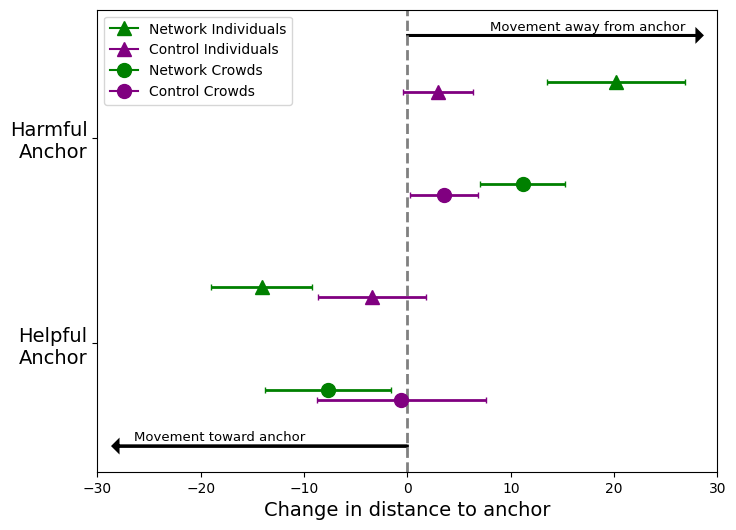

In [9]:
# Create a similar figure, except make it a single plot and insteaad of bars, plot points and 95% confidence intervals. Do this vertically

fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.plot([0,0],[-1,5],'--',color='gray',lw=2)
df_individual = df_individuals
axs.plot(df_individual['Away'].iloc[0], [4.05],color='green', ms=10, marker = '^', label = 'Network Individuals')
axs.errorbar(df_individual['Away'].iloc[0], [4.05], xerr=df_individual['Away_cis'].iloc[0], fmt='none', ecolor='green', capsize=2, lw=2)
axs.plot(df_individual['Away'].iloc[1], [3.95],color='purple', ms=10, marker = '^', label = 'Control Individuals')
axs.errorbar(df_individual['Away'].iloc[1], [3.95], xerr=df_individual['Away_cis'].iloc[1], fmt='none', ecolor='purple', capsize=2, lw=2)


axs.plot(away[0], [3.05],color='green', ms=10, marker = 'o', label = 'Network Crowds')
axs.errorbar(away[0], [3.05], xerr=away_cis[0], fmt='none', ecolor='green', capsize=2, lw=2)
axs.plot(away[1], [2.95],color='purple', ms=10, marker = 'o', label = 'Control Crowds')
axs.errorbar(away[1], [2.95], xerr=away_cis[1], fmt='none', ecolor='purple', capsize=2, lw=2)


axs.plot(df_individual['Toward'].iloc[0], [2.05],color='green', ms=10, marker = '^')
axs.errorbar(df_individual['Toward'].iloc[0], [2.05], xerr=df_individual['Toward_cis'].iloc[0], fmt='none', ecolor='green', capsize=2, lw=2)
axs.plot(df_individual['Toward'].iloc[1], [1.95],color='purple', ms=10, marker = '^')
axs.errorbar(df_individual['Toward'].iloc[1], [1.95], xerr=df_individual['Toward_cis'].iloc[1], fmt='none', ecolor='purple', capsize=2, lw=2)

axs.plot(toward[0], [1.05],color='green', ms=10, marker = 'o')
axs.errorbar(toward[0], [1.05], xerr=toward_cis[0], fmt='none', ecolor='green', capsize=2, lw=2)
axs.plot(toward[1], [0.95],color='purple', ms=10, marker = 'o')
axs.errorbar(toward[1], [0.95], xerr=toward_cis[1], fmt='none', ecolor='purple', capsize=2, lw=2)


axs.arrow(0, 4.5, 28, 0, head_width=0.1, head_length=0.5, fc='k', ec='k', lw=2)
axs.arrow(0, 0.5, -28, 0, head_width=0.1, head_length=0.5, fc='k', ec='k', lw=2)


axs.set_yticks([1.5,3.5])
axs.set_yticklabels(['Helpful\nAnchor', 'Harmful\nAnchor'],fontsize=14)
axs.set_xlabel('Change in distance to anchor',fontsize=14)
axs.text(8,4.55,'Movement away from anchor',fontsize=9.5)
axs.text(-26.5,0.55,'Movement toward anchor',fontsize=9.5)
axs.set_ylim(0.25,4.75)
axs.set_xlim(-30,30)
axs.legend()
plt.show()


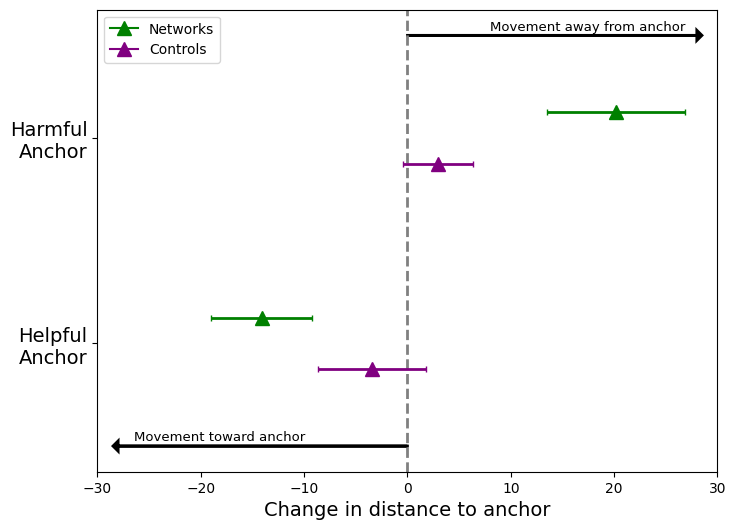

In [13]:
# Create a similar figure, except make it a single plot and insteaad of bars, plot points and 95% confidence intervals. Do this vertically

fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.plot([0,0],[-1,5],'--',color='gray',lw=2)
df_individual = df_individuals
axs.plot(df_individual['Away'].iloc[0], [3.75],color='green', ms=10, marker = '^', label = 'Networks')
axs.errorbar(df_individual['Away'].iloc[0], [3.75], xerr=df_individual['Away_cis'].iloc[0], fmt='none', ecolor='green', capsize=2, lw=2)
axs.plot(df_individual['Away'].iloc[1], [3.25],color='purple', ms=10, marker = '^', label = 'Controls')
axs.errorbar(df_individual['Away'].iloc[1], [3.25], xerr=df_individual['Away_cis'].iloc[1], fmt='none', ecolor='purple', capsize=2, lw=2)


axs.plot(df_individual['Toward'].iloc[0], [1.75],color='green', ms=10, marker = '^')
axs.errorbar(df_individual['Toward'].iloc[0], [1.75], xerr=df_individual['Toward_cis'].iloc[0], fmt='none', ecolor='green', capsize=2, lw=2)
axs.plot(df_individual['Toward'].iloc[1], [1.25],color='purple', ms=10, marker = '^')
axs.errorbar(df_individual['Toward'].iloc[1], [1.25], xerr=df_individual['Toward_cis'].iloc[1], fmt='none', ecolor='purple', capsize=2, lw=2)

axs.arrow(0, 4.5, 28, 0, head_width=0.1, head_length=0.5, fc='k', ec='k', lw=2)
axs.arrow(0, 0.5, -28, 0, head_width=0.1, head_length=0.5, fc='k', ec='k', lw=2)


axs.set_yticks([1.5,3.5])
axs.set_yticklabels(['Helpful\nAnchor', 'Harmful\nAnchor'],fontsize=14)
axs.set_xlabel('Change in distance to anchor',fontsize=14)
axs.text(8,4.55,'Movement away from anchor',fontsize=9.5)
axs.text(-26.5,0.55,'Movement toward anchor',fontsize=9.5)
axs.set_ylim(0.25,4.75)
axs.set_xlim(-30,30)
axs.legend()
plt.show()


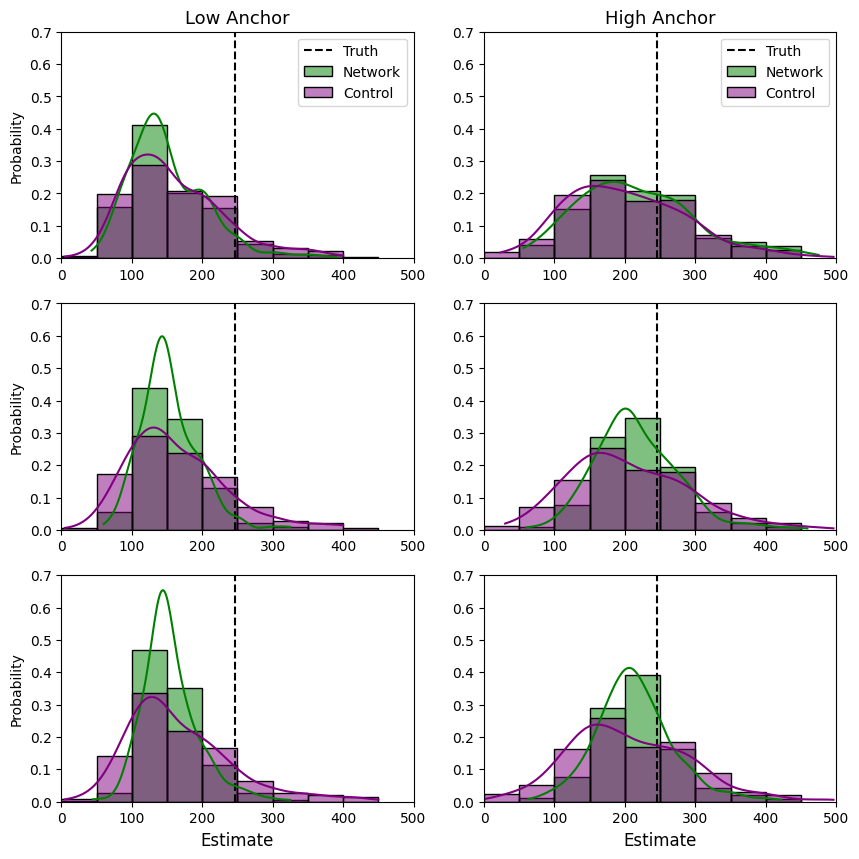

In [23]:
# Make PDFs of the data each round
df = df.loc[(df['response_1'] < 500) & (df['response_2'] < 500) & (df['response_3'] < 500)]

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
upper_lim = 500
upper_lim_y = 0.7
bin_bounds = [i * 50 for i in range(10)]

for ax in axs.flatten():
    ax.axvline(246, color='black', linestyle='--', label='Truth')
    ax.set_xlim(0, upper_lim)
    ax.set_ylim(0, upper_lim_y)
    ax.set_title('')

sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_1'], bins=bin_bounds, ax=axs[0, 0], kde=True, color='green',alpha=0.5, stat='probability',label='Network')
sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_1'], bins=bin_bounds, ax=axs[0, 0], kde=True, color='purple',alpha=0.5, stat='probability',label='Control')

sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_1'], bins=bin_bounds, ax=axs[0, 1], kde=True, color='green',alpha=0.5, stat='probability',label='Network')
sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_1'], bins=bin_bounds, ax=axs[0, 1], kde=True, color='purple',alpha=0.5, stat='probability',label='Control')

sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_2'], bins=bin_bounds, ax=axs[1, 0], kde=True, color='green',alpha=0.5, stat='probability')
sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_2'], bins=bin_bounds, ax=axs[1, 0], kde=True, color='purple',alpha=0.5, stat='probability')

sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_2'], bins=bin_bounds, ax=axs[1, 1], kde=True, color='green',alpha=0.5, stat='probability')
sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_2'], bins=bin_bounds, ax=axs[1, 1], kde=True, color='purple',alpha=0.5, stat='probability')


sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_3'], bins=bin_bounds, ax=axs[2, 0], kde=True, color='green',alpha=0.5, stat='probability')
sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_3'], bins=bin_bounds, ax=axs[2, 0], kde=True, color='purple',alpha=0.5, stat='probability')

sns.histplot(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_3'], bins=bin_bounds, ax=axs[2, 1], kde=True, color='green',alpha=0.5, stat='probability')
sns.histplot(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_3'], bins=bin_bounds, ax=axs[2, 1], kde=True, color='purple',alpha=0.5, stat='probability')

axs[0, 0].set_title('Low Anchor',fontsize=13)
axs[0, 1].set_title('High Anchor',fontsize=13)
axs[0,0].legend()
axs[0,1].legend()
axs[0,0].set_xlabel(None)
axs[0,1].set_xlabel(None)
axs[1,0].set_xlabel(None)
axs[1,1].set_xlabel(None)
axs[0,1].set_ylabel(None)
axs[1,1].set_ylabel(None)
axs[2,1].set_ylabel(None)
axs[2, 0].set_xlabel('Estimate',fontsize=12)
axs[2, 1].set_xlabel('Estimate',fontsize=12)



plt.show()

In [ ]:
# Create CDFs for each round
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

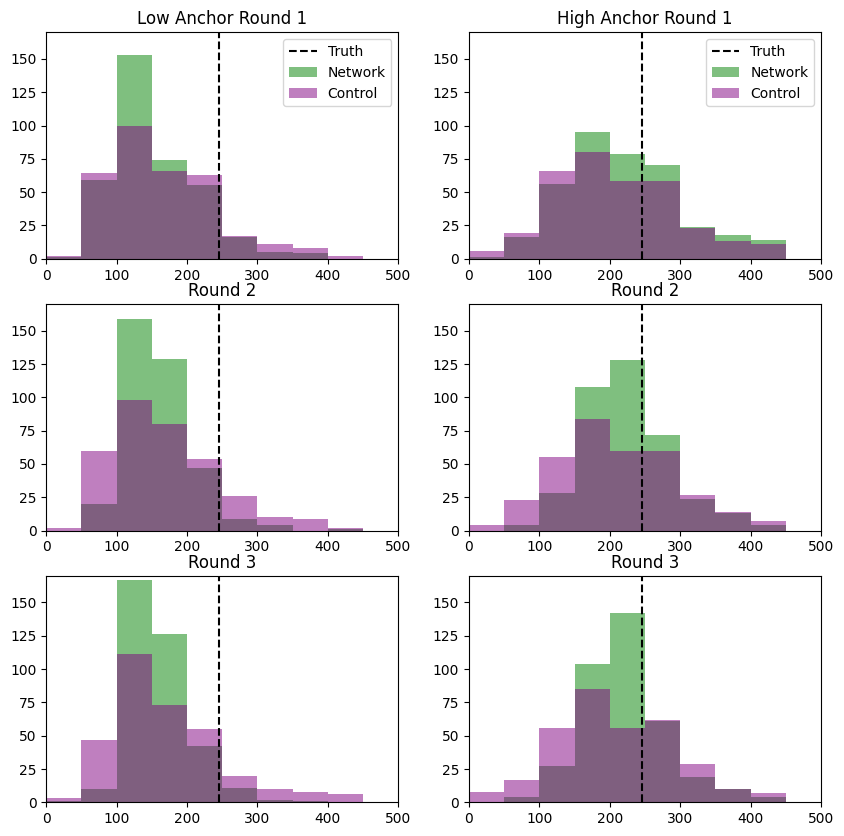

In [3]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
upper_lim = 500
upper_lim_y = 170
bin_bounds = [i * 50 for i in range(10)]

for ax in axs.flatten():
    ax.axvline(246, color='black', linestyle='--', label='Truth')
    
axs[0,0].hist(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_1'], bins=bin_bounds, color='green', alpha=0.5, label='Network')
axs[0,0].hist(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_1'], bins=bin_bounds, color='purple', alpha=0.5, label='Control')

axs[0,0].set_xlim(0, upper_lim)
axs[0,0].set_ylim(0, upper_lim_y)
axs[0,0].set_title('Low Anchor Round 1')
axs[0,0].legend()

axs[0,1].hist(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_1'], bins=bin_bounds, color='green', alpha=0.5, label='Network')
axs[0,1].hist(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_1'], bins=bin_bounds, color='purple', alpha=0.5, label='Control')

axs[0,1].set_xlim(0, upper_lim)
axs[0,1].set_ylim(0, upper_lim_y)
axs[0,1].set_title('High Anchor Round 1')
axs[0,1].legend()

axs[1,0].hist(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_2'], bins=bin_bounds, color='green', alpha=0.5, label='Network')
axs[1,0].hist(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_2'], bins=bin_bounds, color='purple', alpha=0.5, label='Control')
axs[1,0].set_xlim(0, upper_lim)
axs[1,0].set_ylim(0, upper_lim_y)
axs[1,0].set_title('Round 2')

axs[1,1].hist(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_2'], bins=bin_bounds, color='green', alpha=0.5, label='Network')
axs[1,1].hist(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_2'], bins=bin_bounds, color='purple', alpha=0.5, label='Control')
axs[1,1].set_xlim(0, upper_lim)
axs[1,1].set_ylim(0, upper_lim_y)
axs[1,1].set_title('Round 2')

axs[2,0].hist(df.loc[(df.Net_type =='Network') & (df.Condition =='Low')]['response_3'], bins=bin_bounds, color='green', alpha=0.5, label='Network')
axs[2,0].hist(df.loc[(df.Net_type =='Control') & (df.Condition =='Low')]['response_3'], bins=bin_bounds, color='purple', alpha=0.5, label='Control')
axs[2,0].set_xlim(0, upper_lim)
axs[2,0].set_ylim(0, upper_lim_y)
axs[2,0].set_title('Round 3')

axs[2,1].hist(df.loc[(df.Net_type =='Network') & (df.Condition =='High')]['response_3'], bins=bin_bounds, color='green', alpha=0.5, label='Network')
axs[2,1].hist(df.loc[(df.Net_type =='Control') & (df.Condition =='High')]['response_3'], bins=bin_bounds, color='purple', alpha=0.5, label='Control')
axs[2,1].set_xlim(0, upper_lim)
axs[2,1].set_ylim(0, upper_lim_y)
axs[2,1].set_title('Round 3')


plt.show()

In [35]:
df['Anchor'] = np.where(df['Condition'] == 'Low', 118, 353)
df['Mag_Rev1'] = abs(df['response_2'] - df['response_1'])
df['Mag_Rev2'] = abs(df['response_3'] - df['response_2'])
df['Mag_Rev'] = abs(df['response_3'] - df['response_1'])
df['Initial_Error'] = abs(df['response_1'] - df['true_answer'])
df['Second_Error'] = abs(df['response_2'] - df['true_answer'])
df['Final_Error'] = abs(df['response_3'] - df['true_answer'])
df['Dist_Anchor_1'] = abs(df['response_1'] - df['Anchor'])
df['Dist_Anchor_2'] = abs(df['response_2'] - df['Anchor'])
df['Dist_Anchor_3'] = abs(df['response_3'] - df['Anchor'])
df['Difference_Initial_Anchor'] = df['response_1'] - df['Anchor']
df['Difference_Initial_Truth'] = df['response_1'] - 246
df['Matched'] = np.where(df['Difference_Initial_Anchor'] * df['Difference_Initial_Truth'] > 0, 1, 0)
df['Change_accuracy'] = df['Initial_Error'] - df['Final_Error']

df_temp = df.dropna(subset=['group','Net_type','Condition', 'response_1', 'response_2', 'response_3'])
df_temp = df_temp.groupby(['group','Net_type','Condition']).agg({'response_1': np.median,'response_2': np.median,'response_3': np.median})
df_temp['Change_in_Distance'] = df_temp['response_3'] - df_temp['response_1']
df_temp.to_csv('Table_raw.csv')

/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_64927/196615297.py:17: FutureWarning: The provided callable <function median at 0x1078ea980> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_temp = df_temp.groupby(['group','Net_type','Condition']).agg({'response_1': np.median,'response_2': np.median,'response_3': np.median})
/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_64927/196615297.py:17: FutureWarning: The provided callable <function median at 0x1078ea980> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_temp = df_temp.groupby(['group','Net_type','Condition']).agg({'response_1': np.median,'response_2': np.median,'response_3': np.median})


# Tables

In [112]:
# Change in proximity to anchor
df = df_raw.copy()
df_temp = df.dropna(subset=['group','Net_type','Condition','Matched', 'response_1','response_2', 'response_3'])
df_temp = df_temp.groupby(['group','Net_type','Condition','Matched']).agg({'response_1': np.median,'response_2': np.median,'response_3': np.median})
df_temp.to_csv('Tables/TableS2_RAW.csv')

/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_70647/468119061.py:4: FutureWarning: The provided callable <function median at 0x106652160> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_temp = df_temp.groupby(['group','Net_type','Condition','Matched']).agg({'response_1': np.median,'response_2': np.median,'response_3': np.median})
/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_70647/468119061.py:4: FutureWarning: The provided callable <function median at 0x106652160> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_temp = df_temp.groupby(['group','Net_type','Condition','Matched']).agg({'response_1': np.median,'response_2': np.median,'response_3': np.median})


In [111]:
# Change in proximity to truth
df_temp = df.dropna(subset=['group','Net_type','Condition', 'response_1','response_2', 'response_3','Mag_Rev'])
rcs = []
for g in df_temp.group.unique():
    df_t = df_temp.loc[df_temp.group == g]
    rcs.append(round(stats.pearsonr(df_t.Initial_Error, df_t.Mag_Rev)[0],2))
df_temp = df_temp.groupby(['group','Net_type','Condition']).agg({'response_1': np.median,'response_2': np.median,'response_3': np.median})
df_temp.to_csv('Tables/TableS1_Estimates-RAW.csv')

/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_70647/2194041781.py:7: FutureWarning: The provided callable <function median at 0x106652160> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_temp = df_temp.groupby(['group','Net_type','Condition']).agg({'response_1': np.median,'response_2': np.median,'response_3': np.median})
/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_70647/2194041781.py:7: FutureWarning: The provided callable <function median at 0x106652160> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_temp = df_temp.groupby(['group','Net_type','Condition']).agg({'response_1': np.median,'response_2': np.median,'response_3': np.median})
